In [8]:
# converts arff to csv so that it can be read into pandas dataframe

import os

def getCSVFromArff(fileName):
    with open(fileName, 'r') as fin:
        data = fin.read().splitlines(True)
    i = 0
    cols = []
    for line in data:
        line = line.lower()
        if ('@data' in line):
            i+= 1
            break
        else:
            #print line
            i+= 1
            if (line.startswith('@attribute')):
                if('{' in line):
                    cols.append(line[11:line.index('{')-1])
                else:
                    cols.append(line[11:line.index(' ', 11)])
    headers = ",".join(cols)
    with open(fileName + '.csv', 'w') as fout:
        fout.write(headers)
        fout.write('\n')
        fout.writelines(data[i:])

filename=os.path.basename("/Behavior of the urban traffic - modified.arff")
getCSVFromArff("Behavior of the urban traffic - modified.arff")


Behavior of the urban traffic - modified.arff


In [37]:
#Import data in pandas and remove all leading and lagging blank spaces

import pandas as pd
df = pd.read_csv('Behavior of the urban traffic - modified.arff.csv',delimiter = ',')
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

print(df.astype(bool).sum(axis=0))

hour                                     140
immobilized_bus                           36
broken_truck                              74
vehicle_excess                           140
accident_victim                          138
running_over                             140
fire_vehicles                            140
occurrence_involving_freight               1
incident_involving_dangerous_freight     138
lack_of_electricity                       10
fire                                       1
point_of_flooding                          7
manifestations                             7
defect_in_the_network_of_trolleybuses    138
tree_on_the_road                           6
semaphore_off                            139
intermittent_semaphore                     2
slowness_in_traffic_percent              140
dtype: int64


In [107]:
# plot pair plot chart to look at the spread of the data

print(1)

1


In [38]:
# Get the data type of all the features for converting all to float/int for regression
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 18 columns):
hour                                     140 non-null object
immobilized_bus                          140 non-null float64
broken_truck                             140 non-null float64
vehicle_excess                           140 non-null object
accident_victim                          140 non-null object
running_over                             140 non-null object
fire_vehicles                            140 non-null object
occurrence_involving_freight             140 non-null float64
incident_involving_dangerous_freight     140 non-null object
lack_of_electricity                      140 non-null float64
fire                                     140 non-null float64
point_of_flooding                        140 non-null float64
manifestations                           140 non-null float64
defect_in_the_network_of_trolleybuses    140 non-null object
tree_on_the_road                  

In [39]:
print('hour', df['hour'].unique())
print('immobilized_bus', df['immobilized_bus'].unique())
print('broken_truck', df['broken_truck'].unique())
print('vehicle_excess', df['vehicle_excess'].unique())
print('accident_victim', df['accident_victim'].unique())
print('running_over', df['running_over'].unique())
print('fire_vehicles', df['fire_vehicles'].unique())
print('occurrence_involving_freight', df['occurrence_involving_freight'].unique())
print('incident_involving_dangerous_freight', df['incident_involving_dangerous_freight'].unique())
print('fire', df['fire'].unique())
print('point_of_flooding', df['point_of_flooding'].unique())
print('manifestations', df['manifestations'].unique())
print('defect_in_the_network_of_trolleybuses', df['defect_in_the_network_of_trolleybuses'].unique())
print('tree_on_the_road', df['tree_on_the_road'].unique())
print('semaphore_off', df['semaphore_off'].unique())
print('intermittent_semaphore', df['intermittent_semaphore'].unique())
print('lack_of_electricity', df['lack_of_electricity'].unique())
print('slowness_in_traffic_percent', df['slowness_in_traffic_percent'].unique())

hour ['7:00' '7:30' '8:00' '8:30' '9:00' '9:30' '10:00' '10:30' '11:00' '11:30'
 '12:00' '12:30' '13:00' '13:30' '14:00' '14:30' '15:00' '15:30' '16:00'
 '16:30' '17:00' '17:30' '18:00' '18:30' '19:00' '19:30' '20:00']
immobilized_bus [0. 2. 1. 4.]
broken_truck [   0. 1000.    2.    1.    5.    4.    3.]
vehicle_excess ['T' 'F' 'f']
accident_victim ['0.0' '1.0' '2.0' '3.0' '-0.0' '']
running_over ['0.0' 'NO' '1.0' '2.0' '-1.0']
fire_vehicles ['NO' '0.0' 'YES']
occurrence_involving_freight [0. 1.]
incident_involving_dangerous_freight ['0.0' '1.0' '']
fire [0. 1.]
point_of_flooding [0.e+00 2.e+03 1.e+00 3.e+00 7.e+00]
manifestations [ 0.  1. -1.]
defect_in_the_network_of_trolleybuses ['0.0' '1.0' '3.0' '2.0' '-8.0' '']
tree_on_the_road [0. 1.]
semaphore_off ['0.0' '1.0' '2.0' '4.0' '']
intermittent_semaphore [0. 1.]
lack_of_electricity [0. 1. 2. 4. 3.]
slowness_in_traffic_percent [ 4.1  6.6  8.7  9.2 11.1 10.9  8.3  8.2  7.6  6.4  5.2  4.7  4.8  4.9
  5.1  5.3  6.9  6.7  8.1  9.5  9.4  9

In [40]:
# data manipulation and wrangling 

df2 = df.copy()
df['hour'] = df['hour'].str.replace(':','') # remove colon from hour
df['vehicle_excess'].replace('T', 1, inplace= True)
df['vehicle_excess'].replace(['F' ,'f'], 0, inplace= True)
df['fire_vehicles'].replace('YES', 1, inplace= True)
df['fire_vehicles'].replace('NO', 0, inplace= True)
df['running_over'].replace('NO', 0, inplace= True)
df['accident_victim'].replace('', 0, inplace= True)
df['incident_involving_dangerous_freight'].replace('', 0, inplace= True) # replace blank values with 0
df['defect_in_the_network_of_trolleybuses'].replace('', 0, inplace= True)
df['semaphore_off'].replace('', 0, inplace= True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 18 columns):
hour                                     140 non-null object
immobilized_bus                          140 non-null float64
broken_truck                             140 non-null float64
vehicle_excess                           140 non-null int64
accident_victim                          140 non-null object
running_over                             140 non-null object
fire_vehicles                            140 non-null object
occurrence_involving_freight             140 non-null float64
incident_involving_dangerous_freight     140 non-null object
lack_of_electricity                      140 non-null float64
fire                                     140 non-null float64
point_of_flooding                        140 non-null float64
manifestations                           140 non-null float64
defect_in_the_network_of_trolleybuses    140 non-null object
tree_on_the_road                   

In [41]:
# convert data type of features with object data type to float

df.immobilized_bus = df.immobilized_bus.astype(float).fillna(0.0)
df.accident_victim = df.accident_victim.astype(float).fillna(0.0)
df.running_over = df.running_over.astype(float).fillna(0.0)
df.fire_vehicles = df.fire_vehicles.astype(float).fillna(0.0)
df.incident_involving_dangerous_freight = df.incident_involving_dangerous_freight.astype(float).fillna(0.0)
df.defect_in_the_network_of_trolleybuses = df.defect_in_the_network_of_trolleybuses.astype(float).fillna(0.0)
df.semaphore_off = df.semaphore_off.astype(float).fillna(0.0)
df.hour = df.hour.astype(float).fillna(0.0)
print(df.info())

df = df.abs()

df_rfe = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 18 columns):
hour                                     140 non-null float64
immobilized_bus                          140 non-null float64
broken_truck                             140 non-null float64
vehicle_excess                           140 non-null int64
accident_victim                          140 non-null float64
running_over                             140 non-null float64
fire_vehicles                            140 non-null float64
occurrence_involving_freight             140 non-null float64
incident_involving_dangerous_freight     140 non-null float64
lack_of_electricity                      140 non-null float64
fire                                     140 non-null float64
point_of_flooding                        140 non-null float64
manifestations                           140 non-null float64
defect_in_the_network_of_trolleybuses    140 non-null float64
tree_on_the_road             

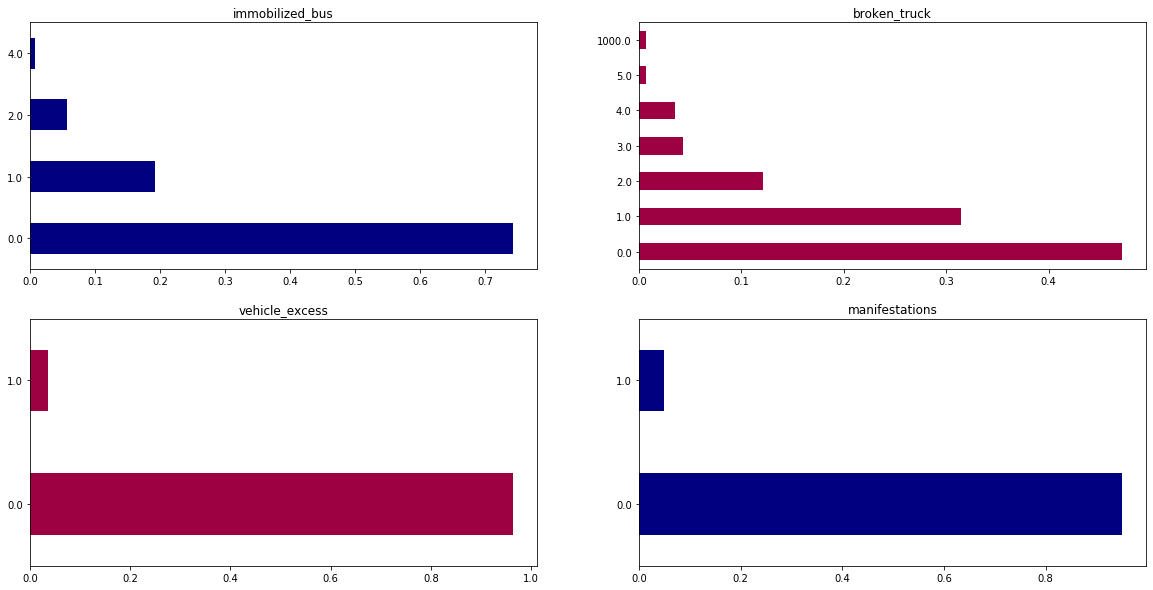

In [42]:

import matplotlib.pyplot as plt 
plt.figure(1) 
from matplotlib import cm
cmap = cm.get_cmap('jet')
cmap1 = cm.get_cmap('Spectral')

plt.subplot(221) 
df['immobilized_bus'].value_counts(normalize=True).plot.barh(figsize=(20,10), cmap=cmap, title= 'immobilized_bus') 

plt.subplot(222) 
df['broken_truck'].value_counts(normalize=True).plot.barh(title= 'broken_truck', cmap=cmap1) 

plt.subplot(223) 
df['vehicle_excess'].value_counts(normalize=True).plot.barh(title= 'vehicle_excess', cmap=cmap1) 

plt.subplot(224) 
df['manifestations'].value_counts(normalize=True).plot.barh(title= 'manifestations', cmap=cmap) 


plt.show()



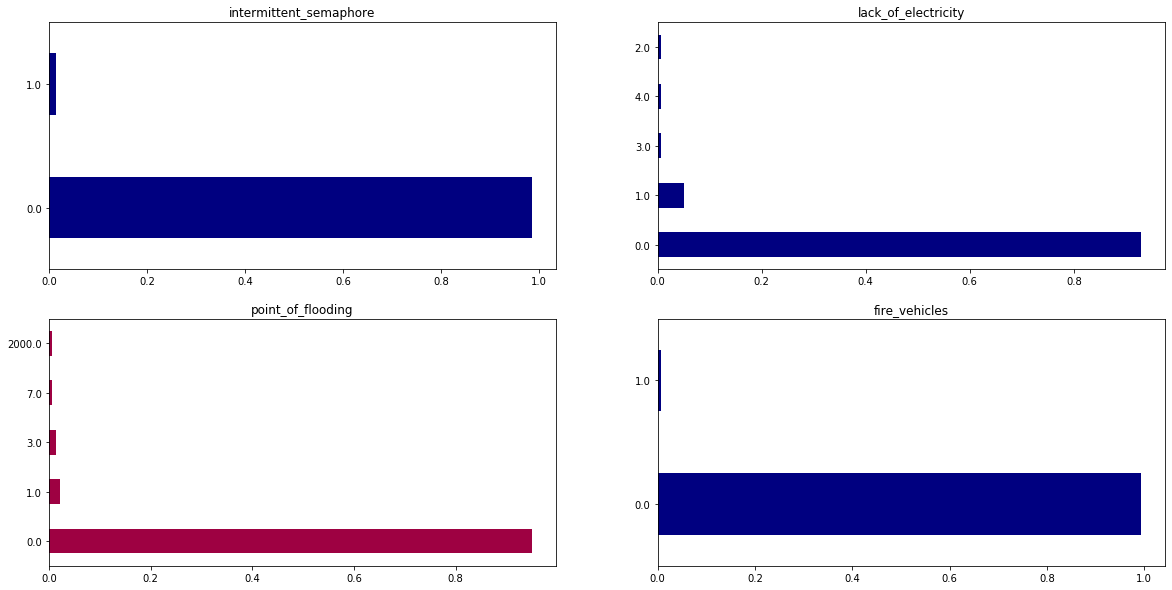

In [43]:
plt.subplot(221) 
df['intermittent_semaphore'].value_counts(normalize=True).plot.barh(figsize=(20,10), cmap=cmap, title= 'intermittent_semaphore')

plt.subplot(222) 
df['lack_of_electricity'].value_counts(normalize=True).plot.barh(title= 'lack_of_electricity', cmap=cmap)

plt.subplot(223) 
df['point_of_flooding'].value_counts(normalize=True).plot.barh(title= 'point_of_flooding', cmap=cmap1) 

plt.subplot(224) 
df['fire_vehicles'].value_counts(normalize=True).plot.barh(title= 'fire_vehicles', cmap=cmap)

plt.show()

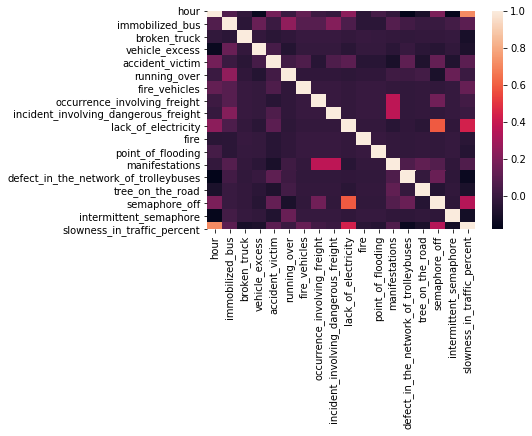

In [44]:
import seaborn as sns

Var_Corr = df.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=False)

# hour, lack_of_electricity , intermittent_semaphore have good relation with target variable
# other features do not have good co-relation for any further action

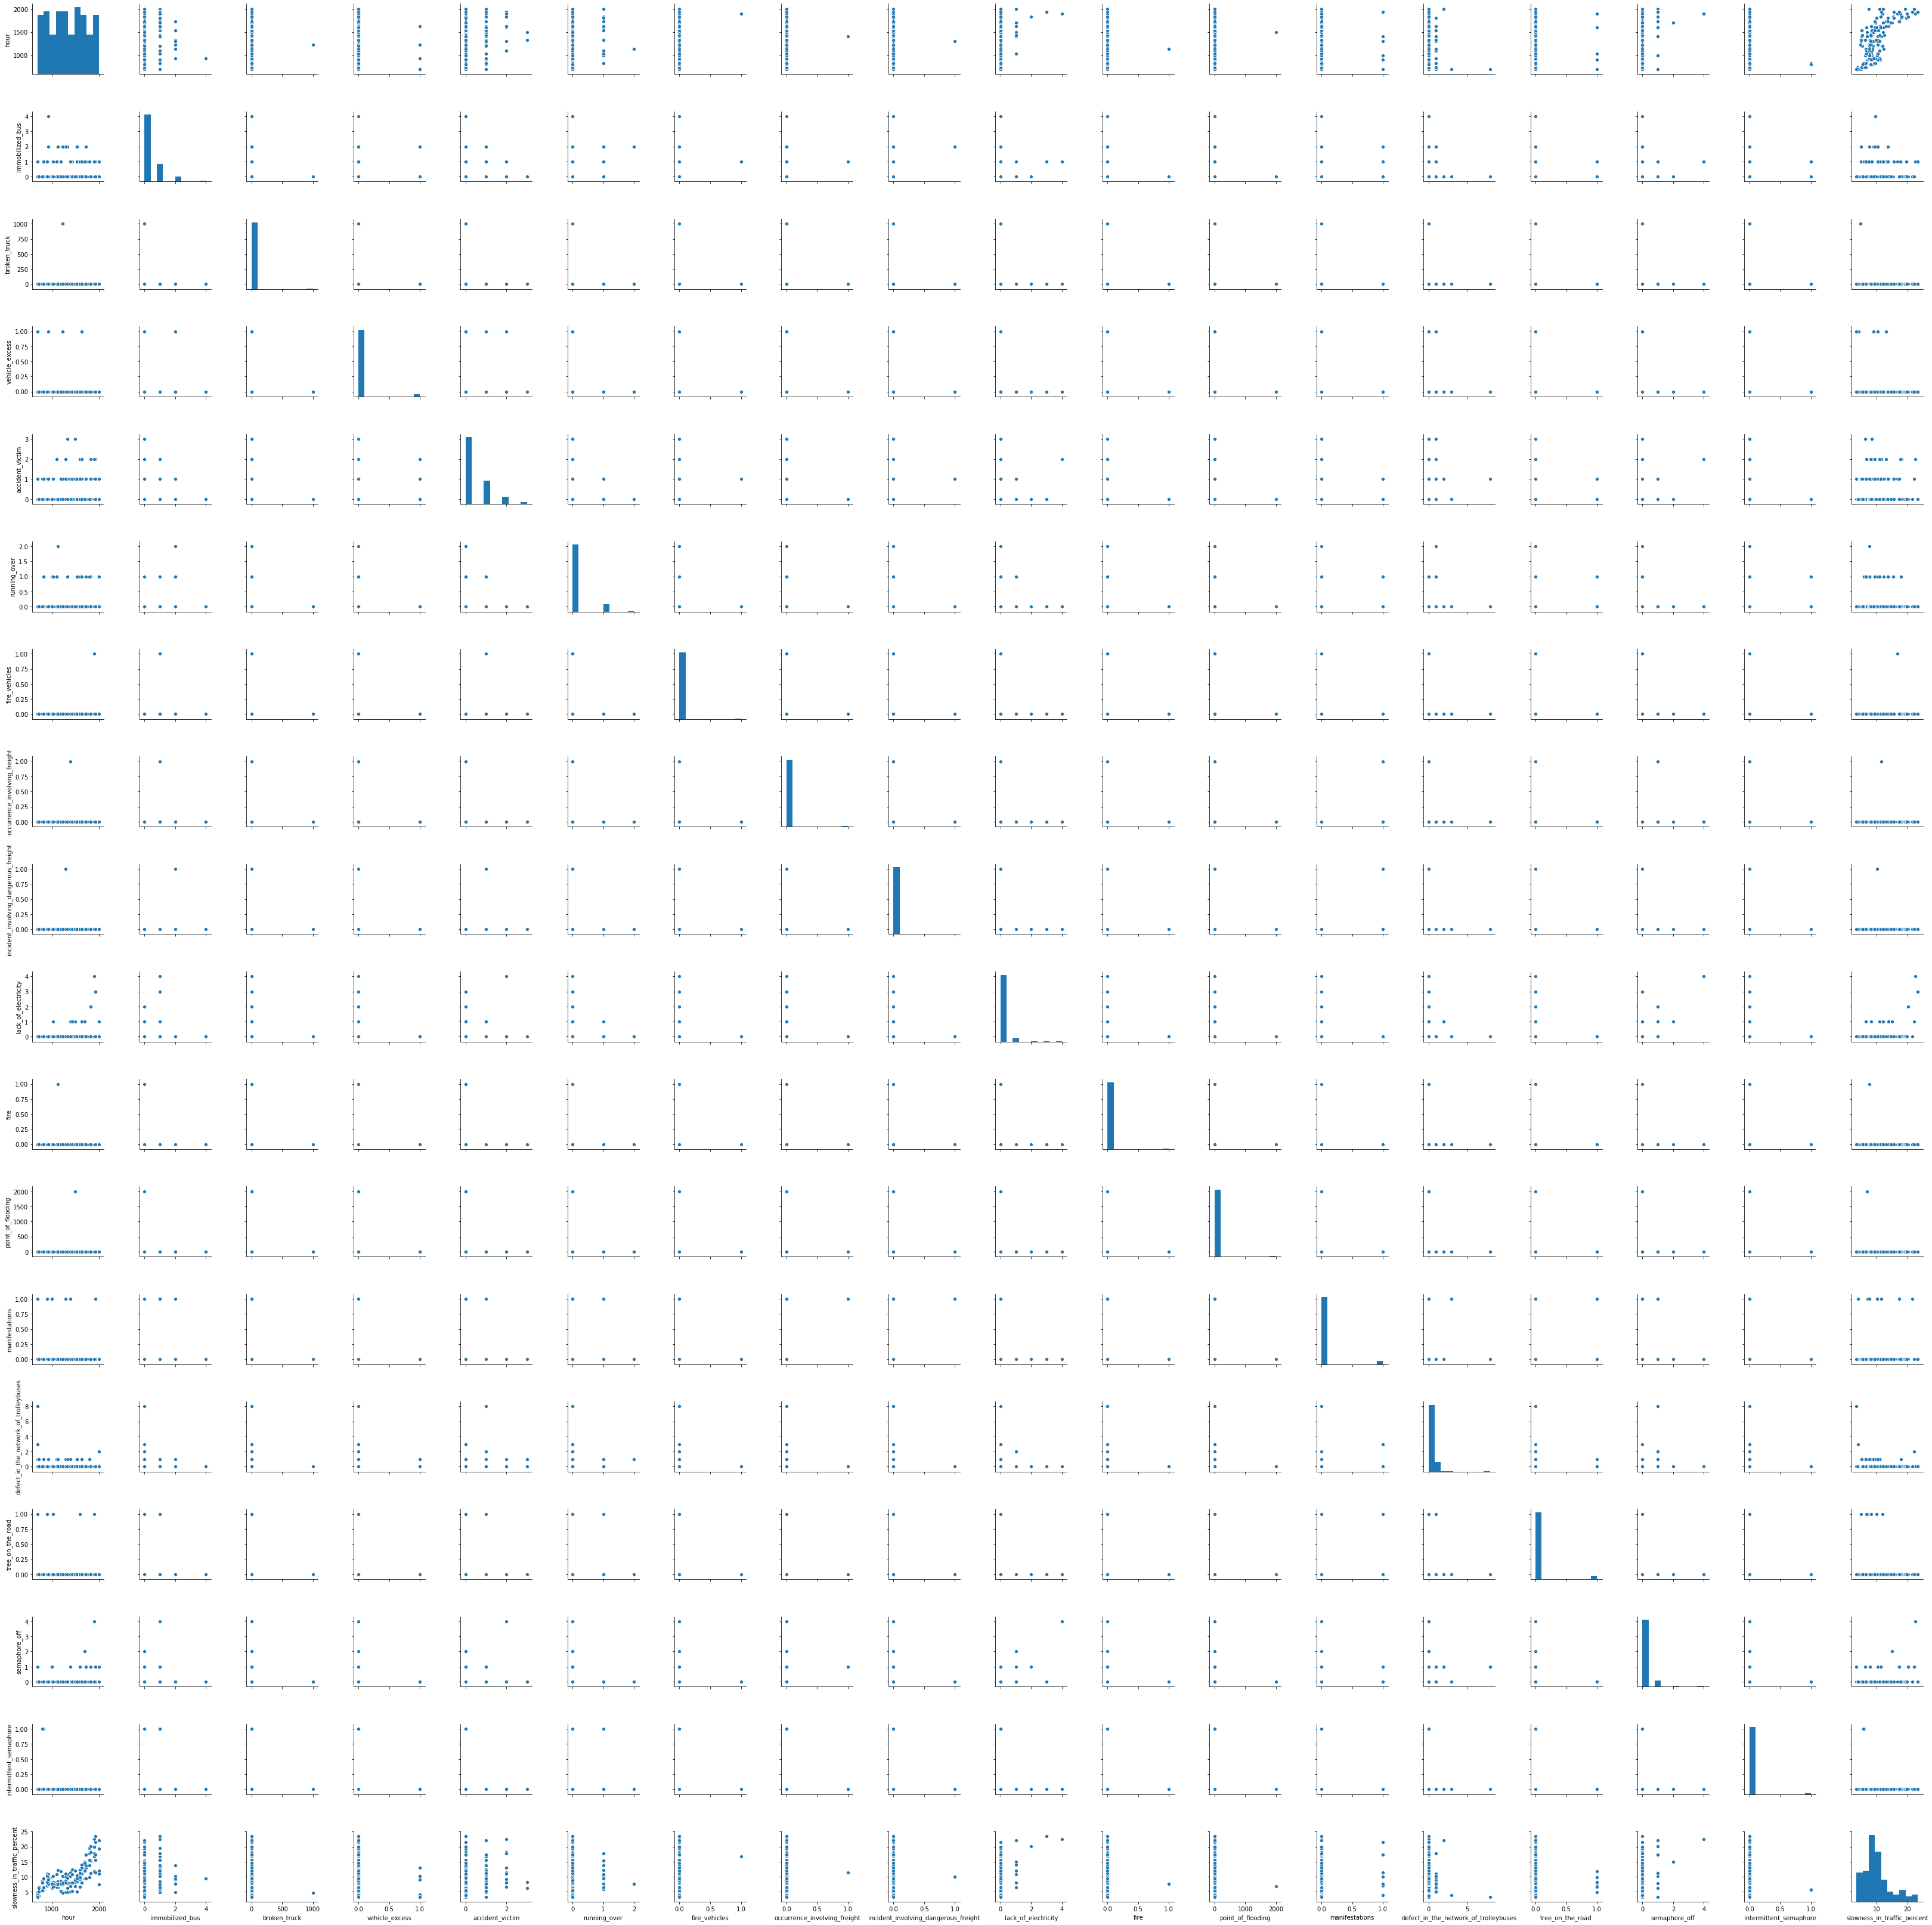

In [8]:
# plot pair plot chart to look at the spread of the data

import seaborn as sns
sns.pairplot(df)

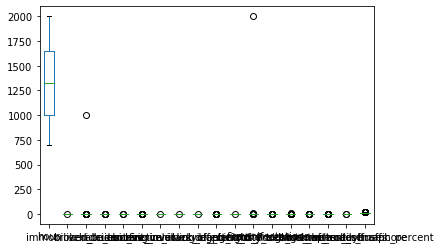

In [27]:
#Outlier detection

ax = df.plot.box()




[[1.65515793 0.51617195 0.09515687 ... 0.27921242 0.12038585 1.36503233]
 [1.57740753 0.51617195 0.09515687 ... 0.27921242 0.12038585 0.78473194]
 [1.39598993 0.51617195 0.09515687 ... 0.27921242 0.12038585 0.2972796 ]
 ...
 [1.45485809 1.02136152 0.09515687 ... 0.27921242 0.12038585 1.79180182]
 [1.53260849 0.51617195 0.04762088 ... 1.89243975 0.12038585 1.72216578]
 [1.71402609 0.51617195 0.09515687 ... 0.27921242 0.12038585 0.49192894]]
(107, 18)


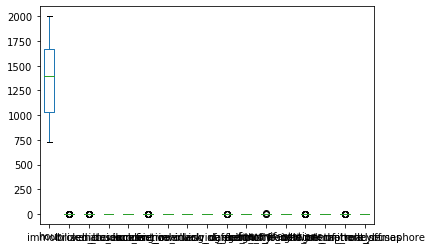

In [45]:
#Outlier detection and removal by Z-score 


from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

df_z = df[(z < 3).all(axis=1)]
print(df_z.shape)

dfc = df_z.copy()
group_names = ['VeryLow','Low', 'Medium', 'High', 'VeryHigh']
dfc['slowness_in_traffic_percent-binned'] = pd.cut(dfc['slowness_in_traffic_percent'], 5, labels=group_names)


y = df_z[['slowness_in_traffic_percent']]
X = df_z.drop(['slowness_in_traffic_percent'], axis=1)



ax = X.plot.box()


(64, 18)


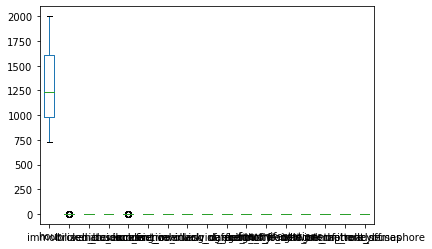

In [29]:
#Outlier detection by IQR 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_IQR.shape)


yI = df_IQR[['slowness_in_traffic_percent']]
XI = df_IQR.drop(['slowness_in_traffic_percent'], axis=1)

ax = XI.plot.box()



In [46]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
print(scaled_df.shape)


#scaler = preprocessing.MinMaxScaler()
#scaled_df = scaler.fit_transform(df)

import numpy as np
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
print ('p value(Prob (F-statistic)) for the estimator is almost zero as per the below summary')






(140, 18)
                                 OLS Regression Results                                
Dep. Variable:     slowness_in_traffic_percent   R-squared:                       0.498
Model:                                     OLS   Adj. R-squared:                  0.451
Method:                          Least Squares   F-statistic:                     10.68
Date:                         Sun, 12 Jan 2020   Prob (F-statistic):           2.36e-11
Time:                                 22:37:52   Log-Likelihood:                -258.12
No. Observations:                          107   AIC:                             536.2
Df Residuals:                               97   BIC:                             563.0
Df Model:                                    9                                         
Covariance Type:                     nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----

/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return

In [47]:
from sklearn.feature_selection import f_regression
f = f_regression(X, y, center=True)

print ('p-value: ',f[1])

p-value:  [1.51367985e-14 2.16684661e-01 4.73891947e-01            nan
 7.05971604e-02 2.01246497e-01            nan            nan
            nan 1.31195890e-01            nan 1.96762587e-04
            nan 2.07927000e-01            nan 2.13974061e-02
            nan]


/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value enco

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
import math

#X_n = X[['hour','fire','point_of_flooding','manifestations','tree_on_the_road','intermittent_semaphore']]

#X_new = X.drop(['intermittent_semaphore', 'tree_on_the_road', 'manifestations', 'fire'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X_new , y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)

reg = LinearRegression().fit(X_train,y_train)
print ('score= ',reg.score(X_test,y_test))
print ('slope= ',reg.coef_)
p = reg.predict(X_test)
print( 'rms= ',math.sqrt(mean_squared_error(y_test, p)))
print('r2: ', r2_score(y_test,p))

(74, 5) (74, 1)
score=  0.011869905803112202
slope=  [[ 1.88522239e+00 -8.88178420e-16 -6.03578907e-01  0.00000000e+00
   1.76437710e+00]]
rms=  3.5125304824714614
r2:  0.011869905803112202


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model


poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
predict_ = poly.fit_transform(predict)

clf = linear_model.LinearRegression()
clf.fit(X_, vector)
print clf.predict(predict_)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#dfc['slowness_in_traffic_percent-binned'] = pd.cut(dfc['slowness_in_traffic_percent'], 5, labels=group_names)


y = dfc[['slowness_in_traffic_percent-binned']]
X = dfc.drop(['slowness_in_traffic_percent','slowness_in_traffic_percent-binned'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)
    
#Construct decision tree
dt = DecisionTreeClassifier(random_state=100)
dt.fit(X_train, y_train)

#Use the decision tree for prediction on test data
y_pred = dt.predict(X_test)
    
    #Prepare the confusion matrix
actuals = np.array(y_test)
predictions = np.array(y_pred)
    

print("Confusion Matrix : ")
print(confusion_matrix(actuals, predictions), "\n")


print ("Accuracy : ", accuracy_score(y_test,y_pred)*100, "\n") 


print("Classification Report : \n", classification_report(y_test, y_pred), "\n")

Confusion Matrix : 
[[1 0 1 0 0]
 [0 6 4 0 4]
 [1 1 2 0 1]
 [1 0 0 0 0]
 [1 5 2 0 3]] 

Accuracy :  36.36363636363637 

Classification Report : 
               precision    recall  f1-score   support

        High       0.25      0.50      0.33         2
         Low       0.50      0.43      0.46        14
      Medium       0.22      0.40      0.29         5
    VeryHigh       0.00      0.00      0.00         1
     VeryLow       0.38      0.27      0.32        11

    accuracy                           0.36        33
   macro avg       0.27      0.32      0.28        33
weighted avg       0.39      0.36      0.36        33
 



/Users/pramanikpramanik/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [51]:
from sklearn.feature_selection import RFE
def get_top_k_features_by_rfe(data, top_k, show_results=True):
    #Preprare the independant and target attributes
    dt = LinearRegression(fit_intercept=True)
    col_length = len(data.columns)
    X = data.iloc[:,0:col_length-1]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range

    #Initializing RFE model
    rfe = RFE(dt, top_k)

    #Transforming data using RFE
    X_rfe = rfe.fit_transform(X,y)  
    
    #Fitting the data to model
    model = dt.fit(X_rfe,y)
    
    #Prepare top k feature list 
    indx= 0 
    feature_list = []
    for col in X.columns:
        if rfe.ranking_[indx] == 1:
            feature_list.append(col)
        indx = indx + 1
    
    if show_results:
        print("Num Features: %d\n" % rfe.n_features_)
        print("Selected Features :" , feature_list)
        #print("Feature Ranking: %s" % rfe.ranking_)  

    return feature_list



dfc = dfc.drop(['slowness_in_traffic_percent-binned'], axis=1)


get_top_k_features_by_rfe(dfc, 5, show_results=True)

Num Features: 5

Selected Features : ['point_of_flooding', 'manifestations', 'defect_in_the_network_of_trolleybuses', 'tree_on_the_road', 'semaphore_off']


['point_of_flooding',
 'manifestations',
 'defect_in_the_network_of_trolleybuses',
 'tree_on_the_road',
 'semaphore_off']

In [53]:
X_new = X[['point_of_flooding',
 'manifestations',
 'defect_in_the_network_of_trolleybuses',
 'tree_on_the_road',
 'semaphore_off']]

y = df_z[['slowness_in_traffic_percent']]

X_train, X_test, y_train, y_test = train_test_split(X_new , y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)

reg = LinearRegression().fit(X_train,y_train)
print ('score= ',reg.score(X_test,y_test))
print ('slope= ',reg.coef_)
p = reg.predict(X_test)
print( 'rms= ',math.sqrt(mean_squared_error(y_test, p)))
print('r2: ', r2_score(y_test,p))

(74, 5) (74, 1)
score=  0.011869905803112202
slope=  [[ 1.88522239e+00 -8.88178420e-16 -6.03578907e-01  0.00000000e+00
   1.76437710e+00]]
rms=  3.5125304824714614
r2:  0.011869905803112202
